# Housing Prices

## Objective:
Create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

## Data Set:
https://www.kaggle.com/anthonypino/melbourne-housing-market

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline


In [2]:
df = pd.read_csv('melbourne-housing-market/Melbourne_housing_FULL.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [22]:
# Postcode is a categorical variable
df['Postcode'] = df['Postcode'].astype('object')

df_nums = df.select_dtypes(exclude='object')
df_nums.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [6]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 14 columns):
Rooms            34857 non-null int64
Price            27247 non-null float64
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Propertycount    34854 non-null float64
house_age        15551 non-null float64
dtypes: float64(13), int64(1)
memory usage: 3.7 MB


In [7]:
df_nums.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,house_age
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000,15551.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306,53.710115
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313,37.328178
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000,-87.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000,19.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000,49.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000,79.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000,823.000000


In [23]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

data_imp = imp_mean.fit_transform(df_nums)
data_imp = pd.DataFrame(data_imp, columns=df_nums.columns)

data_imp['house_age'] = 2019 - data_imp['YearBuilt']

In [53]:
features = ['Rooms', 'Distance', 'Bathroom', 'Car', 'house_age', 'Price']
features_more = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 
                 'Landsize', 'BuildingArea', 'house_age', 'Price']


In [25]:
data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 13 columns):
Rooms            34857 non-null float64
Price            34857 non-null float64
Distance         34857 non-null float64
Bedroom2         34857 non-null float64
Bathroom         34857 non-null float64
Car              34857 non-null float64
Landsize         34857 non-null float64
BuildingArea     34857 non-null float64
YearBuilt        34857 non-null float64
Lattitude        34857 non-null float64
Longtitude       34857 non-null float64
Propertycount    34857 non-null float64
house_age        34857 non-null float64
dtypes: float64(13)
memory usage: 3.5 MB


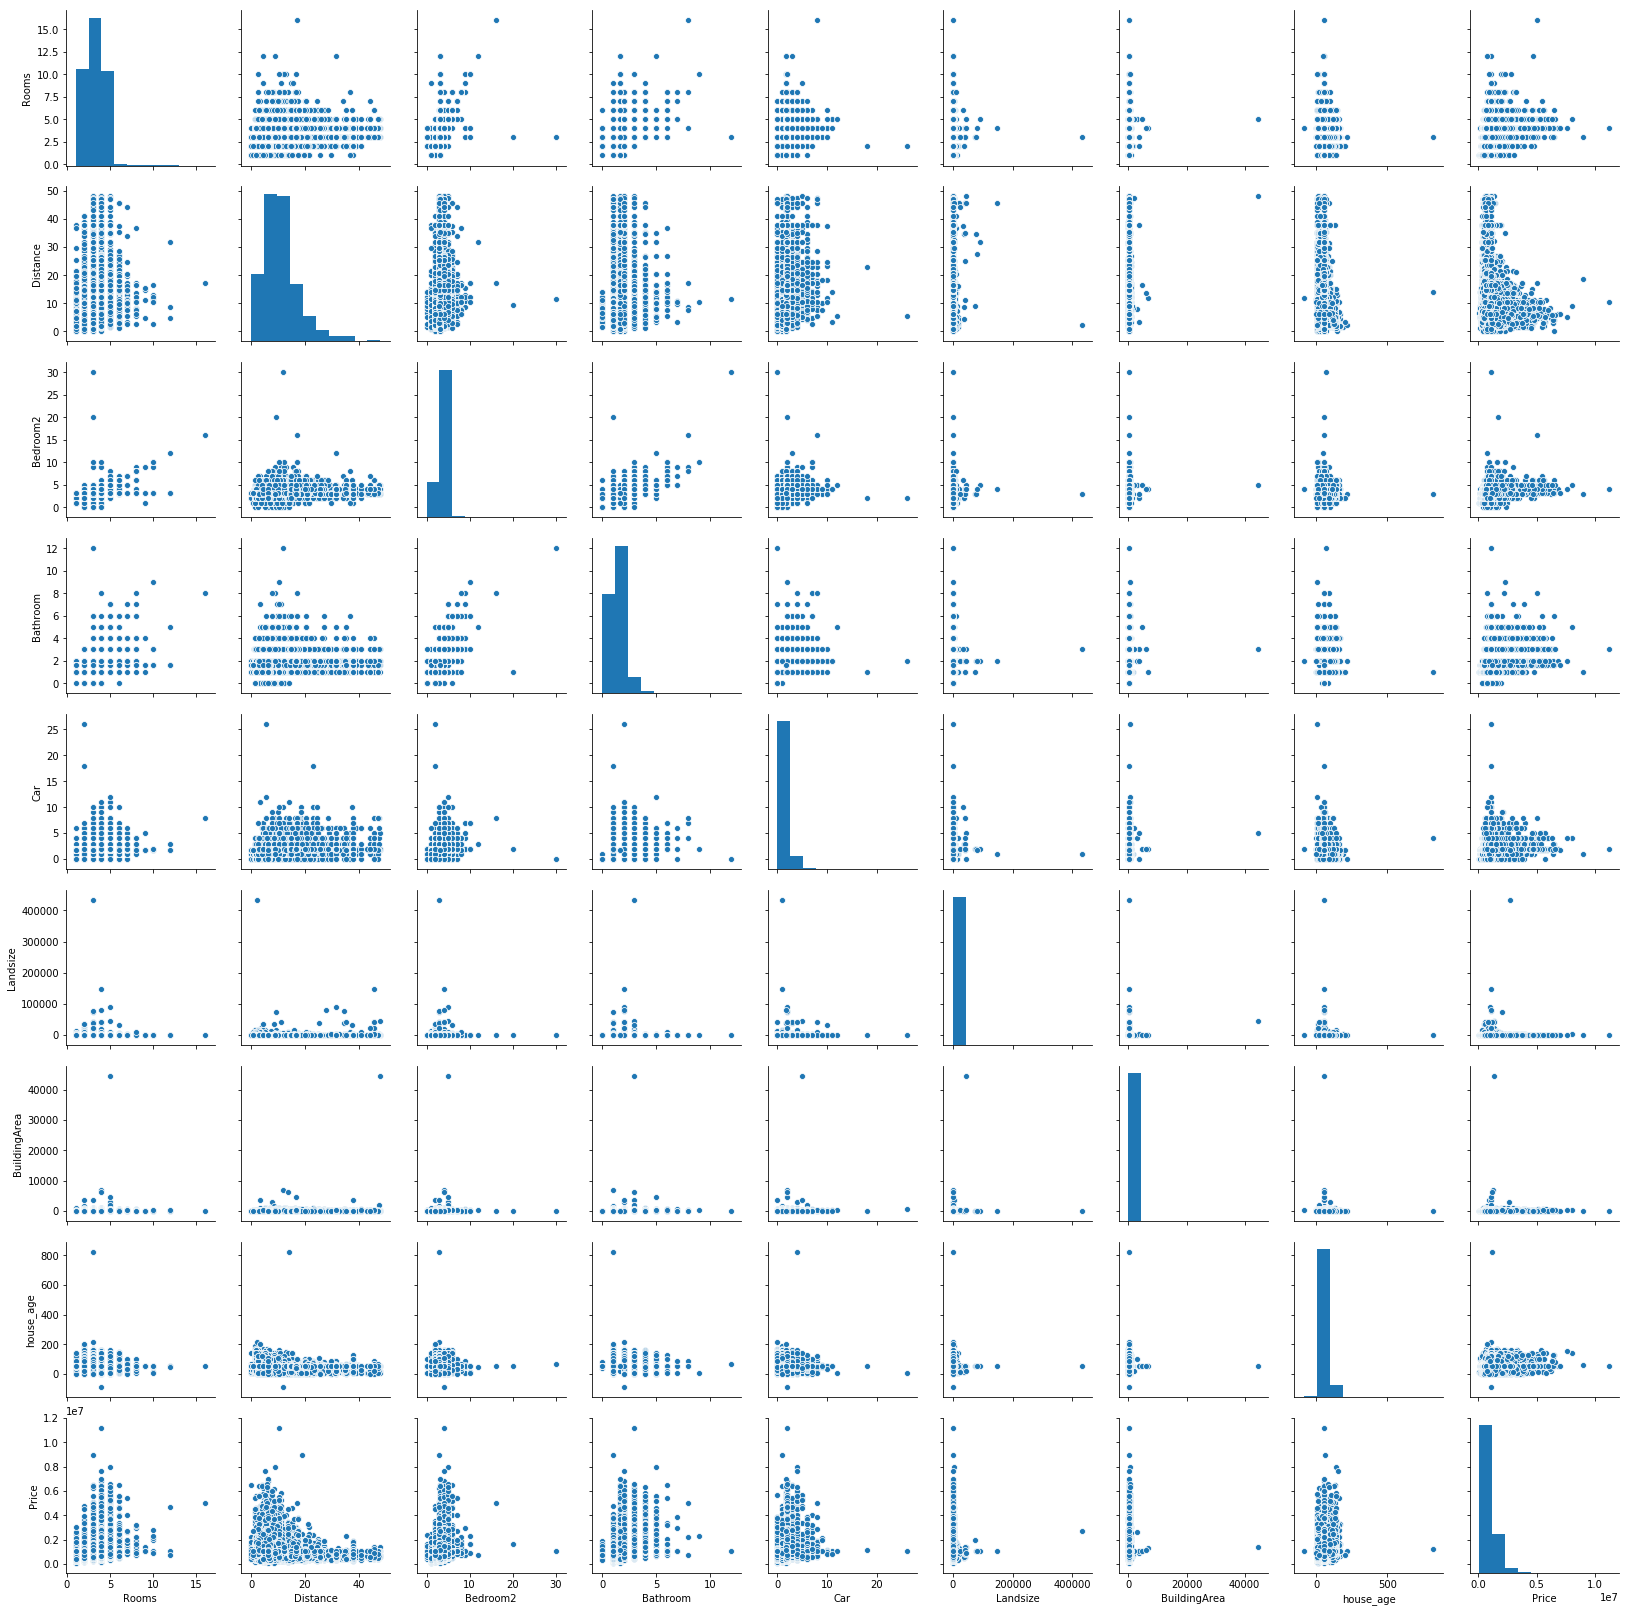

In [26]:
sns.pairplot(data_imp[features_more])

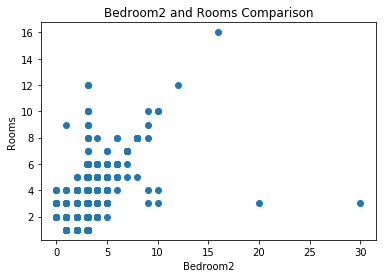

In [30]:
# Check the relationship between Bedrooms2 and Rooms
plt.scatter(data_imp['Bedroom2'], data_imp['Rooms'])
plt.xlabel('Bedroom2')
plt.ylabel('Rooms')
plt.title('Bedroom2 and Rooms Comparison')
plt.show()

These appear to be duplicate variables, exclude Bedrooms2 as less clear what it is.

In [12]:
# This data point likely has a typo or is inaccurate
df[df['YearBuilt'] < 1500]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,1.0,4.0,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0


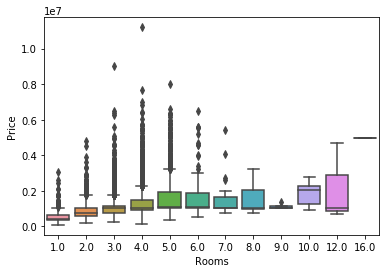

In [31]:
sns.boxplot('Rooms', 'Price', data=data_imp)

In [32]:
data_imp[data_imp['Rooms'] > 10]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,house_age
8309,12.0,1.050173e+06,8.8,3.084647,1.624798,1.728845,593.598993,160.2564,1965.289885,-37.810634,145.001851,14577.0,53.710115
12959,12.0,4.700000e+06,4.6,3.084647,1.624798,1.728845,593.598993,160.2564,1965.289885,-37.830300,145.036700,11308.0,53.710115
26210,16.0,5.000000e+06,17.2,16.000000,8.000000,8.000000,593.598993,160.2564,1965.289885,-37.814050,145.198910,6871.0,53.710115
27150,12.0,7.100000e+05,31.7,12.000000,5.000000,3.000000,960.000000,223.0000,1970.000000,-37.688300,144.577600,3600.0,49.000000


These all look like legitimate data points despite the large number of rooms.  Maybe they are really large houses.

In [109]:
print(data_imp[data_imp['Landsize'] >100000])
print('Mean landsize is {}'.format(data_imp['Landsize'].mean()))

       Rooms      Price  Distance  Bedroom2  Bathroom  Car  Landsize  \
18036    3.0  2700000.0       2.1       3.0       3.0  1.0  433014.0   
26868    4.0  1050000.0      45.9       4.0       2.0  1.0  146699.0   

       BuildingArea    YearBuilt  Lattitude  Longtitude  Propertycount  \
18036      160.2564  1965.289885  -37.79751   144.98309         5825.0   
26868      160.2564  1965.289885  -37.47540   144.51300          249.0   

       house_age  Rooms2  Bathrooms2  
18036  53.710115     9.0         9.0  
26868  53.710115    16.0         4.0  
Mean landsize is 594.0426358584859


In [118]:
data_imp = data_imp[data_imp['Landsize'] < 100000]

In [112]:
print(data_imp[data_imp['BuildingArea'] >10000])

       Rooms      Price  Distance  Bedroom2  Bathroom  Car  Landsize  \
22632    5.0  1355000.0      48.1       5.0       3.0  5.0   44500.0   

       BuildingArea    YearBuilt  Lattitude  Longtitude  Propertycount  \
22632       44515.0  1965.289885  -37.45392   144.58864          849.0   

       house_age  Rooms2  Bathrooms2  
22632  53.710115    25.0         9.0  


In [113]:
data_imp = data_imp[data_imp['BuildingArea'] < 10000]

In [114]:
data_imp[data_imp['Bathroom'] < 1]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,house_age,Rooms2,Bathrooms2


In [119]:
data_imp = data_imp[data_imp['house_age'] < 200]
# Houses without bathrooms don't make sense.  Maybe they are just older houses with shared bathrooms?
data_imp = data_imp[data_imp['Bathroom'] > 0]

In [120]:
# Confirm this data point no longer in the data set
data_imp[data_imp['YearBuilt'] < 1500]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,house_age,Rooms2,Bathrooms2


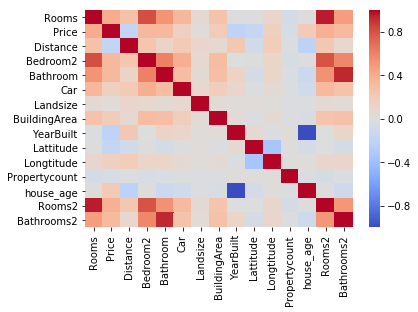

In [121]:
sns.heatmap(data_imp.corr(), vmin=-1, vmax=1, cmap='coolwarm')

In [66]:
X = data_imp[features2].drop('Price', axis=1)
y = data_imp['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.342602427770903


### Scale the data: Use Standard Scalar

In [70]:
features2 = ['Rooms', 'Distance', 'Bathroom', 'Car', 'house_age', 'Lattitude', 'Longtitude', 'Price']
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_imp)
data_scaled = pd.DataFrame(data_scaled, columns=data_imp.columns)

In [72]:
X = data_scaled[features2].drop('Price', axis=1)
y = data_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.3436774732596203


### Try Robust Scaler

In [79]:
features2 = ['Rooms', 'Distance', 'Bathroom', 'Car', 'house_age', 'Lattitude', 'Longtitude', 'Price']
rscaler = RobustScaler()

data_rscale = rscaler.fit_transform(data_imp)
data_rscale = pd.DataFrame(data_rscale, columns=data_imp.columns)

In [81]:
X = data_rscale[features2].drop('Price', axis=1)
y = data_rscale['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.3450360003942554


## Try a different model

In [83]:
data_imp['Rooms2'] = data_imp['Rooms'] * data_imp['Rooms']
data_imp['Bathrooms2'] = data_imp['Bathroom'] * data_imp['Bathroom']

In [129]:
# Tried adding Building Area, did not improve model, also tried Rooms2 and Bathrooms2 for not much gain
features3 = ['Rooms', 'Distance', 'Bathroom', 'Car', 'house_age', 
             'Lattitude', 'Longtitude', 'Price', 'BuildingArea']

In [123]:
rscaler = RobustScaler()

data_rscale = rscaler.fit_transform(data_imp)
data_rscale = pd.DataFrame(data_rscale, columns=data_imp.columns)

In [130]:
X = data_rscale[features2].drop('Price', axis=1)
y = data_rscale['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.35571898415605596


In [131]:
cross_val_score(regr, X_train, y_train, cv=10)

array([0.30205639, 0.33267092, 0.33630029, 0.34607456, 0.31141482,
       0.3235203 , 0.34210692, 0.34353221, 0.34539172, 0.3645844 ])

In [132]:
cross_val_score(regr, X_test, y_test, cv=10)

array([0.37052628, 0.36113086, 0.3197133 , 0.33570014, 0.36035304,
       0.31072073, 0.35344534, 0.39188914, 0.3630107 , 0.3842919 ])

## Try an ensemble forest regressor

In [137]:
X = data_rscale[features2].drop('Price', axis=1)
y = data_rscale['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.43344082352307256


In [138]:
cross_val_score(forest, X_test, y_test, cv=10)

array([0.45444405, 0.336658  , 0.33648638, 0.38242819, 0.44331503,
       0.34674276, 0.41093059, 0.42806083, 0.41308239, 0.44381166])